In [ ]:
TASK 1: Credit Scoring Model

In [5]:
import os
os.listdir("/content")

['.config', 'Task1_German_Credit_Dataset.pdf', 'sample_data']

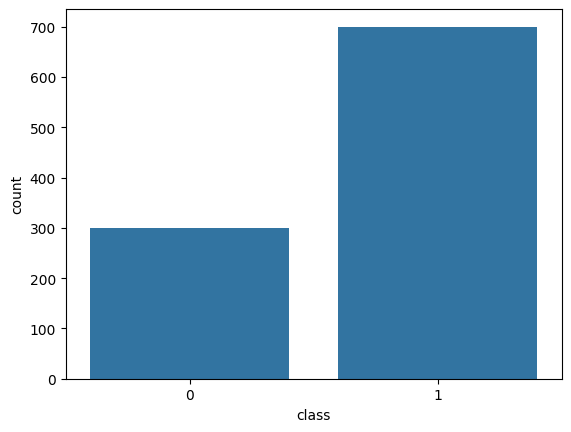

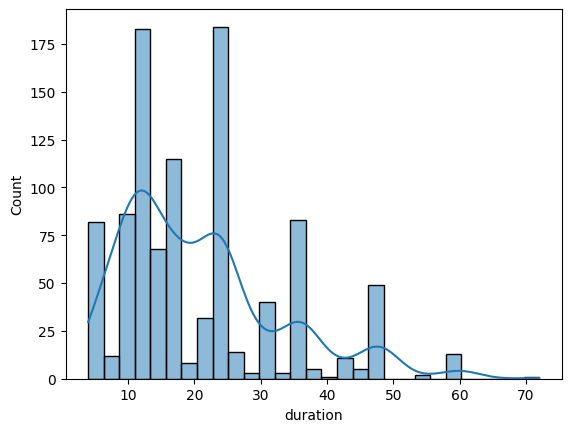

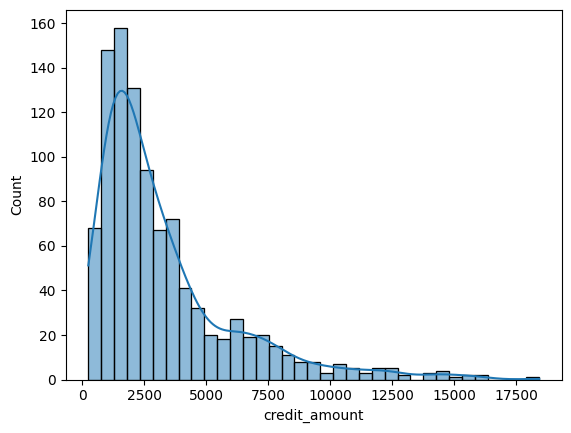

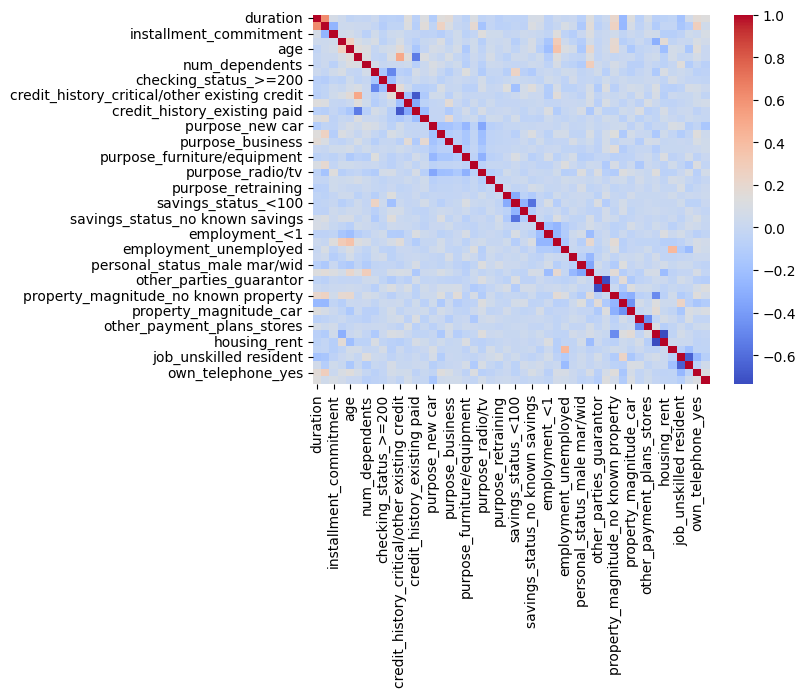

              precision    recall  f1-score   support

           0       0.76      0.42      0.54        59
           1       0.80      0.94      0.86       141

    accuracy                           0.79       200
   macro avg       0.78      0.68      0.70       200
weighted avg       0.78      0.79      0.77       200



In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X, y = fetch_openml("credit-g", version=1, as_frame=True, return_X_y=True)

y = y.map({"good": 1, "bad": 0})

sns.countplot(x=y)
plt.show()

sns.histplot(X["duration"], kde=True)
plt.show()

sns.histplot(X["credit_amount"], kde=True)
plt.show()

X_encoded = pd.get_dummies(X, drop_first=True)

sns.heatmap(X_encoded.corr(), cmap="coolwarm")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
